# ReadMe

This workbook completes the modeling to answer the question:

Can COVID-related outcomes, particularly the percentage of the positive cases, be reliably predicted?

The majority of EDA and Feature Selection was completed in the previous notebook. Prior to modeling, this 
notebook conducts some additional EDA to aid in handling missing values, and feature engineering. 

### Data Loading

In [1]:
import pandas as pd

In [2]:
# Alter the file path if needed

df = pd.read_csv('cleaned_cases_dataset.csv')
df.head()

,smoothed_wcli,smoothed_wlarge_event_1d,smoothed_wrestaurant_1d,smoothed_wspent_time_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcovid_vaccinated,smoothed_wtested_positive_14d
0,3.244379,12.627098,18.571266,34.412959,30.487852,57.334785,2.638200,29.288429
1,0.421245,9.231545,13.132258,31.031930,31.242179,65.756589,15.910167,8.843686
2,1.401254,9.285851,18.465710,33.894471,26.614385,64.266832,4.715310,30.302464
3,2.082898,9.364862,17.593056,30.674532,24.467235,84.360238,4.005679,22.710935
4,1.306140,6.418342,13.814072,30.489939,24.371077,87.764291,6.249659,21.912277


### Data Exploration (Post Feature Selection)

Post feature selection EDA to get an idea of how to approach feature engineering 
and handle missing values

Shape of the DataFrame: (3994, 8)

Data Types:
 smoothed_wcli                     float64
smoothed_wlarge_event_1d          float64
smoothed_wrestaurant_1d           float64
smoothed_wspent_time_1d           float64
smoothed_wwork_outside_home_1d    float64
smoothed_wothers_masked           float64
smoothed_wcovid_vaccinated        float64
smoothed_wtested_positive_14d     float64
dtype: object

Descriptive Statistics:
        smoothed_wcli  smoothed_wlarge_event_1d  smoothed_wrestaurant_1d  \
count    3994.000000               3994.000000              3994.000000   
mean        1.061285                  7.279319                13.280293   
std         0.499955                  3.783448                 5.436167   
min         0.000000                  0.632336                 0.424278   
25%         0.704567                  4.168691                 8.959415   
50%         1.005176                  6.675040                13.280293   
75%         1.341444                  9.848476     

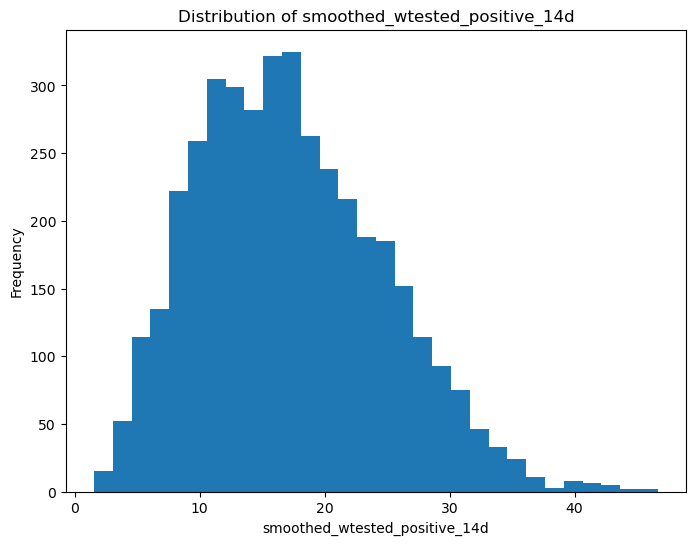


Correlation Matrix:
                                 smoothed_wcli  smoothed_wlarge_event_1d  \
smoothed_wcli                        1.000000                  0.313378   
smoothed_wlarge_event_1d             0.313378                  1.000000   
smoothed_wrestaurant_1d              0.238526                  0.861759   
smoothed_wspent_time_1d              0.119361                  0.871588   
smoothed_wwork_outside_home_1d       0.098859                  0.742224   
smoothed_wothers_masked             -0.432026                 -0.826494   
smoothed_wcovid_vaccinated          -0.227958                  0.270248   
smoothed_wtested_positive_14d        0.638724                  0.356886   

                                smoothed_wrestaurant_1d  \
smoothed_wcli                                  0.238526   
smoothed_wlarge_event_1d                       0.861759   
smoothed_wrestaurant_1d                        1.000000   
smoothed_wspent_time_1d                        0.804012   
smoothe

In [3]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of each column
print("\nData Types:\n", df.dtypes)

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Examine the distribution of the target variable
print("\nDistribution of 'smoothed_wtested_positive_14d':\n", df['smoothed_wtested_positive_14d'].describe())

# Visualize the distribution (histogram)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['smoothed_wtested_positive_14d'], bins=30)
plt.xlabel('smoothed_wtested_positive_14d')
plt.ylabel('Frequency')
plt.title('Distribution of smoothed_wtested_positive_14d')
plt.show()


# Investigate the correlation between features and the target variable
print("\nCorrelation Matrix:\n", df.corr())
print("\nCorrelation with 'smoothed_wtested_positive_14d':\n", df.corr()['smoothed_wtested_positive_14d'])


### Visualization (Post Feature Selection)

Additional data visualization post feature selection to get an idea of how to approach feature engineering 
and handle missing values

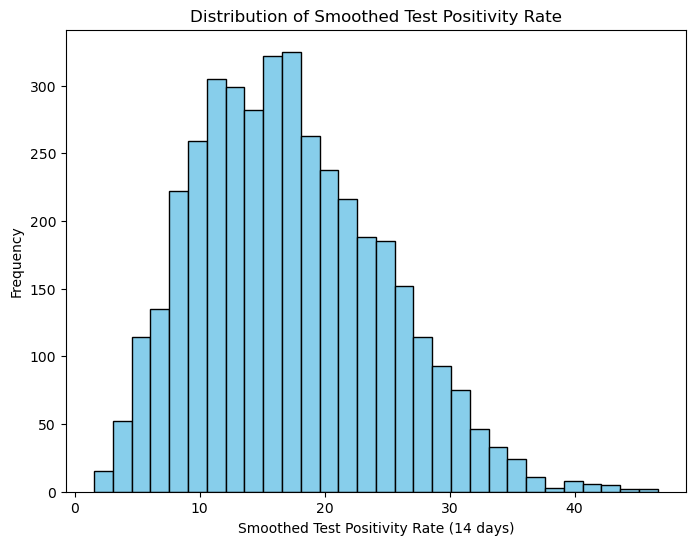

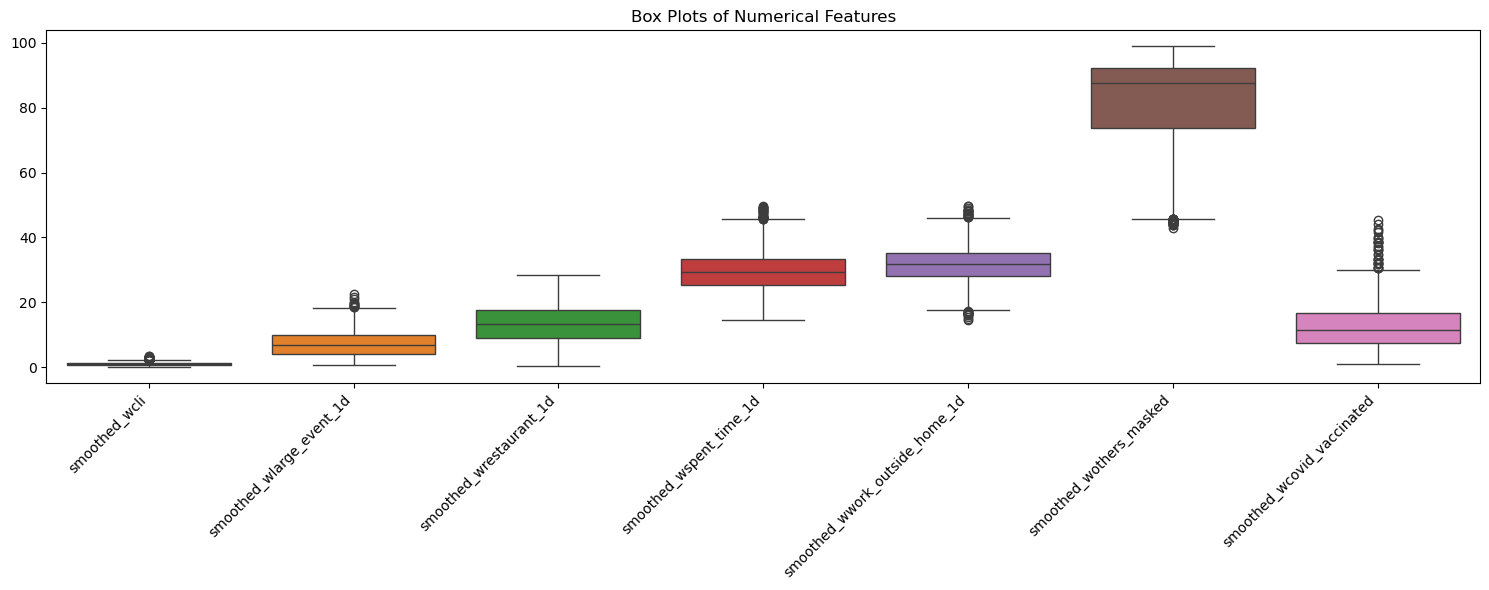

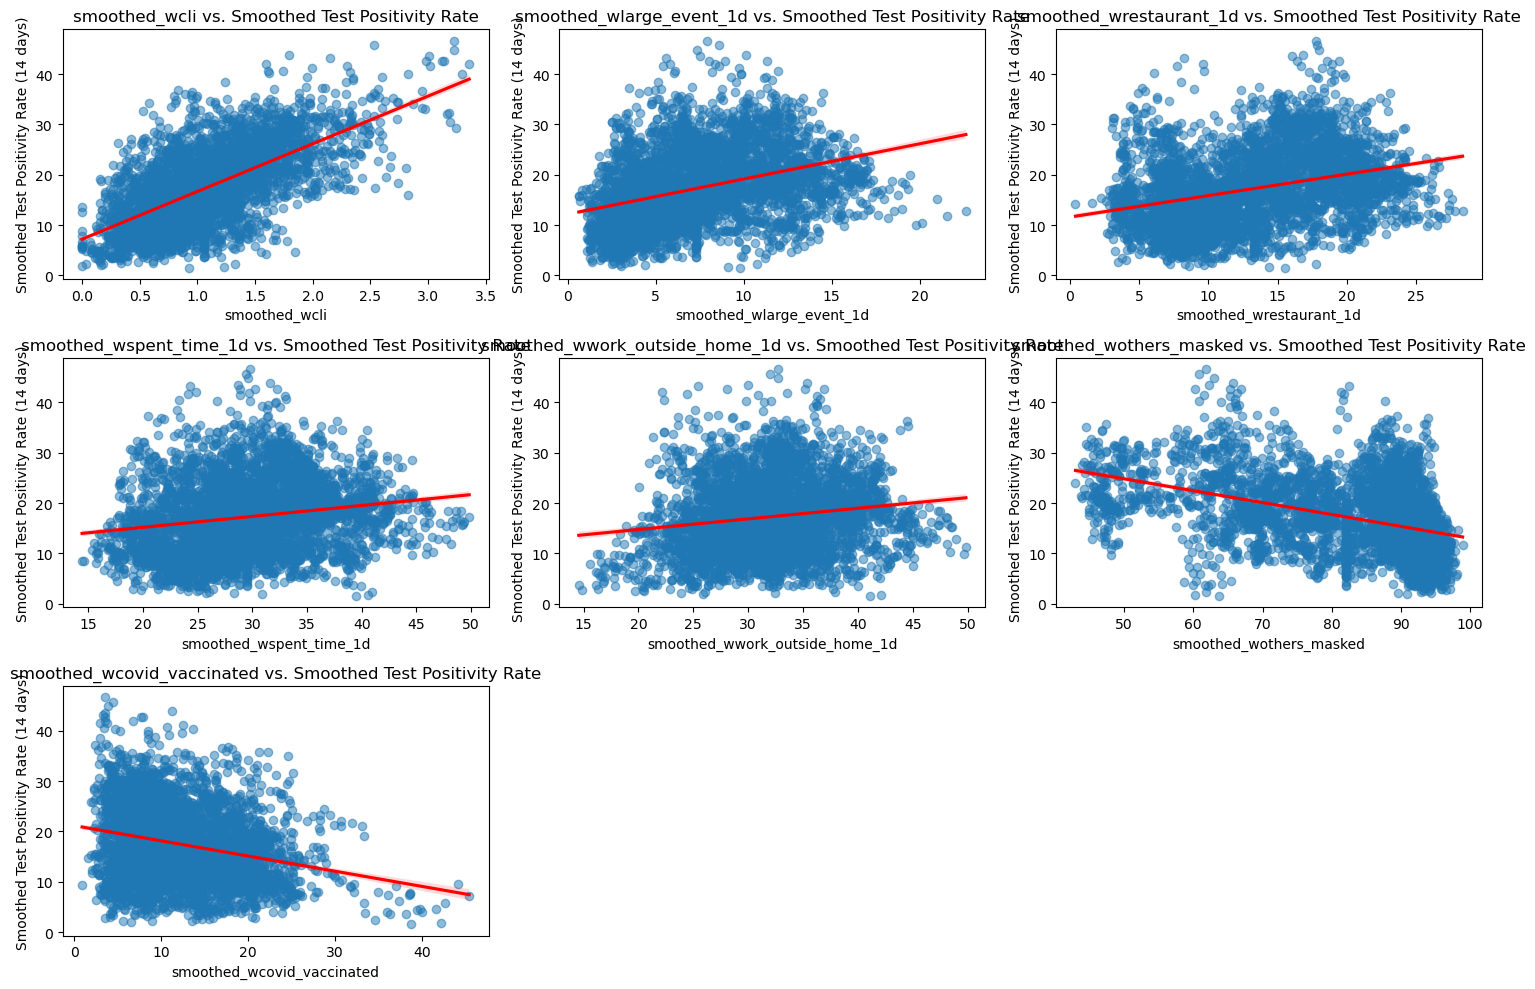

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target variable
plt.figure(figsize=(8, 6))
plt.hist(df['smoothed_wtested_positive_14d'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Smoothed Test Positivity Rate (14 days)')
plt.ylabel('Frequency')
plt.title('Distribution of Smoothed Test Positivity Rate')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.drop('smoothed_wtested_positive_14d', axis=1)) #exclude target variable
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 
#scatter plots for all predictive features
numerical_features = ['smoothed_wcli', 'smoothed_wlarge_event_1d', 'smoothed_wrestaurant_1d',
                      'smoothed_wspent_time_1d', 'smoothed_wwork_outside_home_1d',
                      'smoothed_wothers_masked', 'smoothed_wcovid_vaccinated']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=feature, y='smoothed_wtested_positive_14d', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel(feature)
    plt.ylabel('Smoothed Test Positivity Rate (14 days)')
    plt.title(f'{feature} vs. Smoothed Test Positivity Rate')
plt.tight_layout()
plt.show()

### Additional Data Cleaning (Post Feature Selection)

Now that we have identified missing values, and taken a look at the data distributions, we'll handle

the missing values in the 'smoothed_wcovid_vaccinated' by filling them in with the mean value.

Missing values for percentage of individuals vaccinated by a COVID vaccine were imputed using the mean of 

the dataset generated for predicting positive COVID cases. There were 100 data points with missing values for

’smoothed_wcovid_vaccinated’. We expect the vaccine to have a significant impact on the estimated test positivity rate, 

and as such, determined the value should be imputed with the mean rather than dropping the 100 data points, 

given the relatively small size of the overall dataset (3994).

Each numerical feature was winsorized using the 1st and 99th percentiles, to handle outliers by assigning them the value of the 1st and 99th percetile.


Missing Values per column after imputation:
smoothed_wcli                     0
smoothed_wlarge_event_1d          0
smoothed_wrestaurant_1d           0
smoothed_wspent_time_1d           0
smoothed_wwork_outside_home_1d    0
smoothed_wothers_masked           0
smoothed_wcovid_vaccinated        0
smoothed_wtested_positive_14d     0
dtype: int64


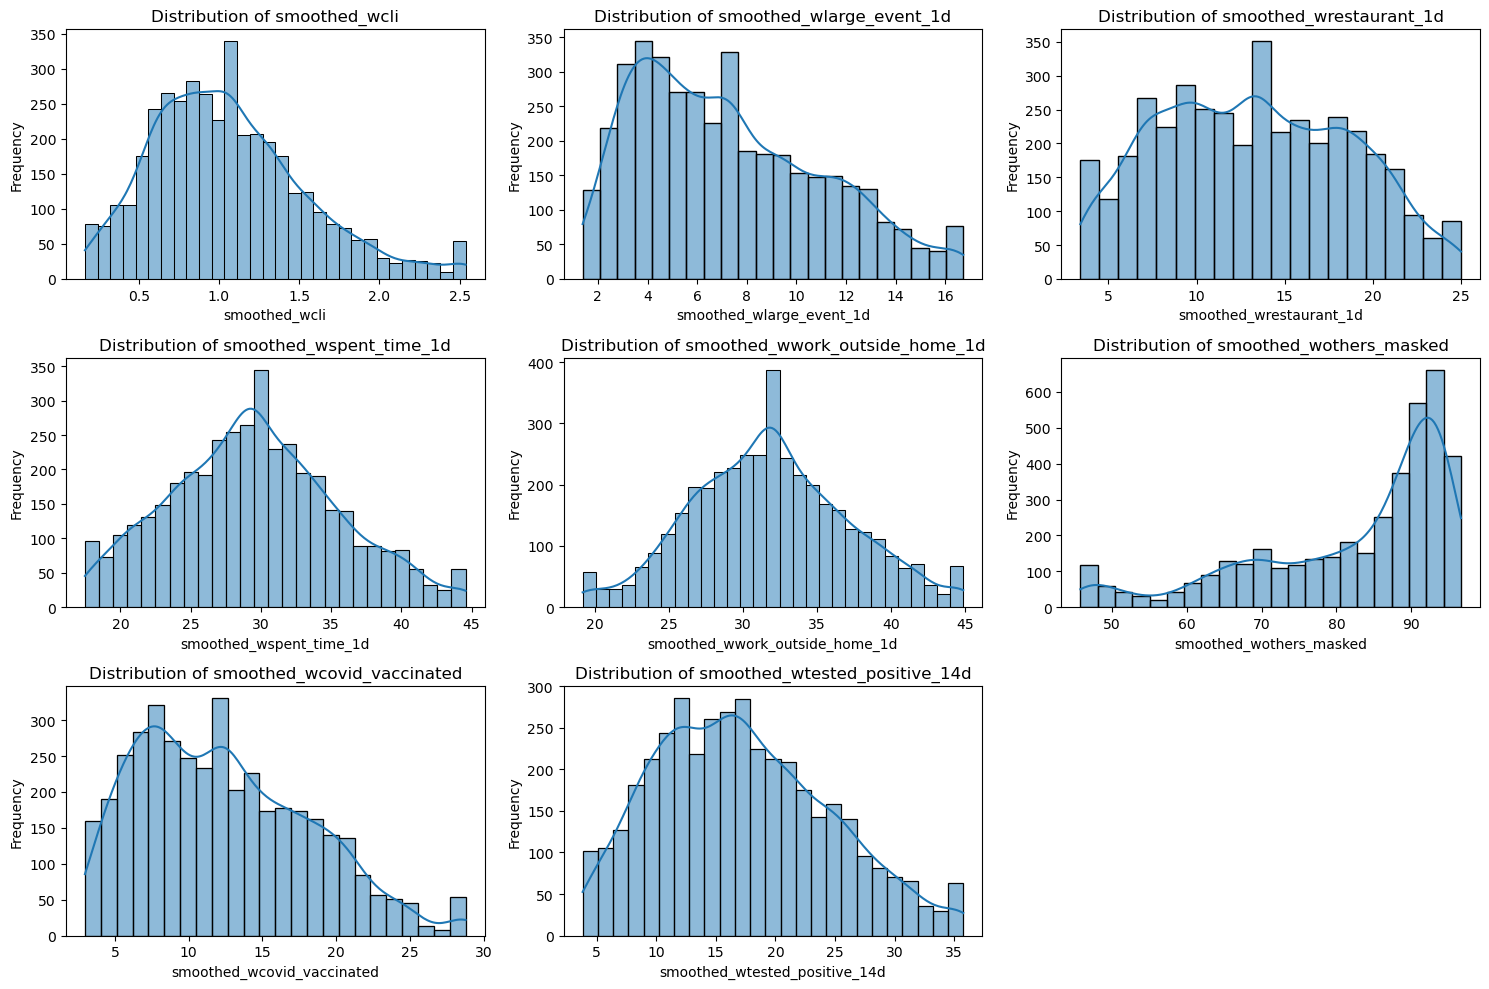

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values in 'smoothed_wcovid_vaccinated' with the mean
median_vaccinated = df['smoothed_wcovid_vaccinated'].mean()
df['smoothed_wcovid_vaccinated'] = df['smoothed_wcovid_vaccinated'].fillna(median_vaccinated)

# Outliers will be handled with winsoring, setting upper 
# limits below and above 1% and 99% percentiles respectively, values above/below
# these limits will be assigne the value of the 1st or 99th percentile
# Define a function for winsorizing
def winsorize_series(series, limits=(0.01, 0.99)):
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(limits[1])
    return np.clip(series, lower_limit, upper_limit)

# Winsorize numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = winsorize_series(df[col])

# Verify data integrity
print("\nMissing Values per column after imputation:")
print(df.isnull().sum())

# Visualize distributions after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Feature Engineering

**Feature Engineered: ‘interaction_cli_vaccinated’ = 'smoothed_wcli' * 'smoothed_wcovid_vaccinated'**

A new feature ‘interaction_cli_vaccinated’ was created to explore the interaction between the percentage of individuals reporting COVID-like illness and the percentage of individuals vaccinated by a COVID vaccine. This has potential to lead to more powerful predictions as we expect areas with higher vaccination rates to have less COVID-like  symptoms reported.


**Feature Engineered: 'interaction_events_restaurant' = 'smoothed_wlarge_event_1d' * 'smoothed_wrestaurant_1d'**

A new feature 'interaction_events_restaurant' was created to explore the interaction between persons who have gone to large public events or public businesses in the past day, and their combined correlation with the target variable. This has the potential to lead to more powerful predictions as we expect these two groups to both contain some of the same individuals, and both contribute to overall COVID cases. Areas where the two features’ combined effect is high we’d expect to observe higher rates of COVID cases. 


**Feature Engineered: 'cli_squared' = ('smoothed_wcli’)2**

A new feature 'cli_squared' was created to amplify the original feature of percentage of persons reporting COVID like symptoms. This has the potential to lead to more powerful predictions as we expect the reporting of COVID like symptoms to be a strong predictor of COVID cases. 


**Feature Engineered: 'vaccinated_cubed' = ('smoothed_wcovid_vaccinated')3**

A new feature 'vaccinated_cubed' was created to amplify the original feature of the percentage of persons vaccinated by a COVID vaccine. This has potential to lead to more powerful predictions as we expect the vaccination rate in an area to be a strong predictor of COVID cases. 



                               interaction_cli_vaccinated  \
interaction_cli_vaccinated                       1.000000   
interaction_events_restaurant                    0.471009   
cli_squared                                      0.446472   
vaccinated_cubed                                 0.556069   
smoothed_wtested_positive_14d                    0.240691   

                               interaction_events_restaurant  cli_squared  \
interaction_cli_vaccinated                          0.471009     0.446472   
interaction_events_restaurant                       1.000000     0.224023   
cli_squared                                         0.224023     1.000000   
vaccinated_cubed                                    0.216028    -0.190142   
smoothed_wtested_positive_14d                       0.321069     0.609062   

                               vaccinated_cubed  smoothed_wtested_positive_14d  
interaction_cli_vaccinated             0.556069                       0.240691  
interact

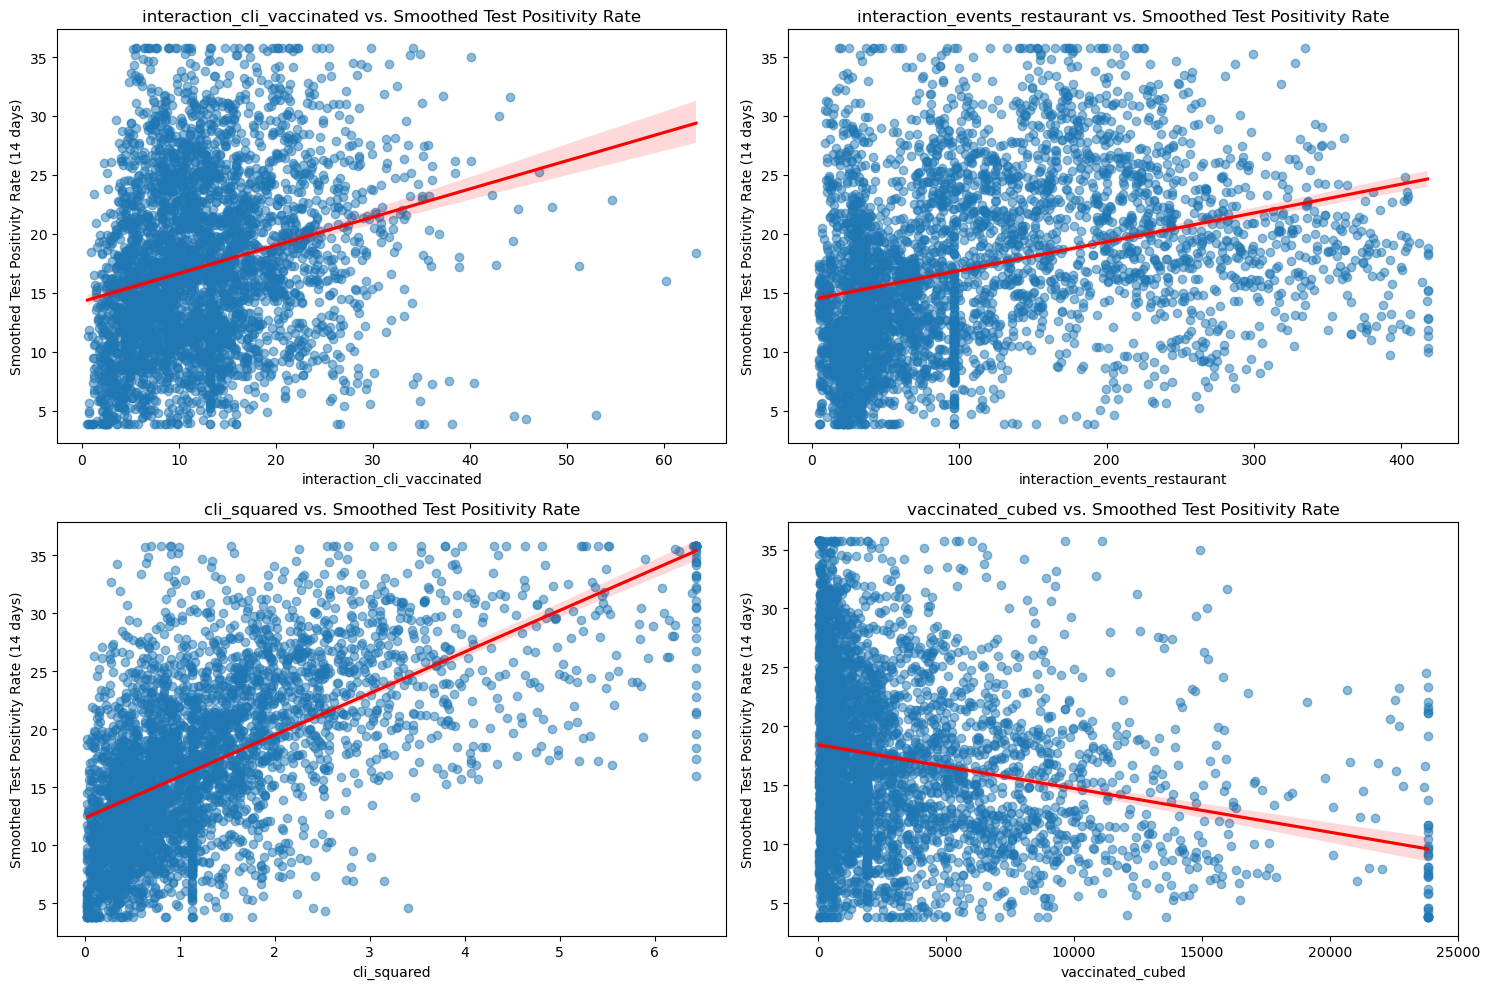

In [6]:
# Feature Engineering - Interaction: Potentially interesting and predicting interaction features
df['interaction_cli_vaccinated'] = df['smoothed_wcli'] * df['smoothed_wcovid_vaccinated']
df['interaction_events_restaurant'] = df['smoothed_wlarge_event_1d'] * df['smoothed_wrestaurant_1d']

# Feature Engineering - Polynomials: Potentially interesting and predicting polynomial features
df['cli_squared'] = df['smoothed_wcli'] ** 2
df['vaccinated_cubed'] = df['smoothed_wcovid_vaccinated'] ** 3

# Evaluate new features
print(df[['interaction_cli_vaccinated', 'interaction_events_restaurant', 'cli_squared', 'vaccinated_cubed', 'smoothed_wtested_positive_14d']].corr())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(['interaction_cli_vaccinated', 'interaction_events_restaurant', 'cli_squared', 'vaccinated_cubed']):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=col, y='smoothed_wtested_positive_14d', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(col)
    plt.ylabel('Smoothed Test Positivity Rate (14 days)')
    plt.title(f'{col} vs. Smoothed Test Positivity Rate')

plt.tight_layout()
plt.show()

### Splitting the Data for Modeling

A Train/Validation/Test split of 70/15/15 is used to provide sufficient data for both training, tuning, and a robust evaluation process. The validation bucket is used to tune our models, such that the test data remains untouched until the final version of our model is reached in order to avoid overfitting, prevent data leakage, and overly optimistic performance results. Stratified sampling by quartiles of the target variable ('smoothed_wtested_positive_14d') was utilized to split the data into the respective buckets. Since the target variables’ distribution is variable across its range of values, this process ensures that each split, train/validation/test, has a representative distribution to the target variable’s distribution. We expect this approach to splitting the data will improve model generalizability, and a more accurate evaluation of the models performance across the data distribution. 


In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = df.drop('smoothed_wtested_positive_14d', axis=1)
y = df['smoothed_wtested_positive_14d']

# Calculate quartiles of the target variable
y_quartiles = pd.qcut(y, q=4, labels=False)

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y_quartiles)

# Second split: 50% validation, 50% test from temp 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=pd.qcut(y_temp, q=4, labels=False))

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2795, 11)
y_train shape: (2795,)
X_val shape: (599, 11)
y_val shape: (599,)
X_test shape: (600, 11)
y_test shape: (600,)


In [8]:
X.head()

,smoothed_wcli,smoothed_wlarge_event_1d,smoothed_wrestaurant_1d,smoothed_wspent_time_1d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcovid_vaccinated,interaction_cli_vaccinated,interaction_events_restaurant,cli_squared,vaccinated_cubed
0,2.536436,12.627098,18.571266,34.412959,30.487852,57.334785,2.964018,7.518043,234.501205,6.433510,26.040085
1,0.421245,9.231545,13.132258,31.031930,31.242179,65.756589,15.910167,6.702085,121.231039,0.177448,4027.395117
2,1.401254,9.285851,18.465710,33.894471,26.614385,64.266832,4.715310,6.607348,171.469842,1.963514,104.840876
3,2.082898,9.364862,17.593056,30.674532,24.467235,84.360238,4.005679,8.343422,164.756541,4.338465,64.272974
4,1.306140,6.418342,13.814072,30.489939,24.371077,87.764291,6.249659,8.162927,88.663442,1.706001,244.100631


In [9]:
X.shape

(3994, 11)

In [10]:
y.shape

(3994,)

### Scale the Features

**Feature Scaling: All Features**

A standard scaler was applied to all numerical features (all features). Although all features were already on a scale of 0-100, the standard scaler helps to prevent features with wider ranges of values from dominating the model. The scaling will help ensure that all features are considered equally important by the model, leading to more accurate feature importance estimates and better interpretability. 



In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training set
scaler.fit(X_train)

# Transform the training, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Model Training

A simple Linear Regression (no regularization) model was used to establish a baseline model to which we will compare improved models to. We chose this model for the baseline for its simplicity and interpretability. Linear Regression as a means to make predictions is widely used, understood, and easy to implement. We can easily interpret the coefficients which will provide us clear insights into the relations between features and the target variable. Establishing a simple baseline enables us to compare results to more complex models and determine if added complexity is in fact adding value to our prediction or not.


#### Baseline Model - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val_scaled)

#### Secondary Model - Linear Regression with Ridge Regularization

The second iteration of the prediction model involved adding regularization to the previous simple linear regression model. Ridge regression adds L2 regularization to the linear regression model which helps to prevent overfitting by penalizing large coefficients. By reducing overfitting the models ability to generalize to new data should be improved as well. It should also improve the model’s ability to handle high correlation between features, multicollinearity. Adding regularization also adds a layer of complexity to the model, in which we introduce a hyperparameter, the regularization strength alpha, which must be tuned to find the optimal balance between the bias-variance tradeoff. A gridsearch was conducted with five different values of alpha 0.01, 0.1, 1.0, 10.0, 100.0, which yielded the best alpha of 1.0. Despite adding some complexity to the model, we saw virtually no improvement over the linear regression model without regularization (see metrics tables for each model). This suggests that there was no overfitting in the original linear regression model, or that the nature of the dataset did not lend itself to the benefits of ridge regression (i.e. no highly correlated features, little noise).


In [13]:
#adding ridge to the linear model
#Gridsearch to find best alpha
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer 

# Define a range of alpha values to explore
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize the Ridge regression model
ridge_model = Ridge()

# Create a scorer object using make_scorer (for negative MAE)
neg_mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  

# Initialize GridSearchCV to find the best alpha
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid={'alpha': alpha_values},
    scoring=neg_mae_scorer,  # Use the negative MAE scorer
    cv=5,  # Use 5-fold cross-validation
    verbose=1,  # Print progress messages
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value and the best estimator
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

print(f"Best alpha: {best_alpha}")

# Train the best Ridge model on the entire training dataset
best_ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_ridge = best_ridge_model.predict(X_val_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha: 1.0


#### Tertiary Model - Random Forest Regressor Model

The Third iteration of the Positive Test Rate prediction model displayed significant improvement over the baseline model, achieving an R2 value of 0.66, indicating the model explains ~66% of the variation in the target variable. This model also showed improvements over the MAE and RMSE decreasing both values, indicating less overall error between the predicted values and actual values. Random forests models can better handle complex, non-linear relationships between the several different features the dataset contained, and the target variable. This model was chosen due to its ensemble nature, making it less sensitive to outliers and noise in the data, which was observed and partially addressed during our Exploratory Data Analysis. Random forests also inherently reduce overfitting through their use of bagging and feature randomness. This model was also utilized due to its level of explainability that decision makers can understand. In this case as we utilize more and more complex models, there is a trade-off between predictive power and more complex models. However, the Random Forest model provides a good balance between the two, while remaining interpretable to non-technical users. The model, as discussed in the metrics section below, provides insights into feature importance which can be informative to decision makers when allocating resources and creating policy. 


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val_scaled)

### Model Evaluation

**k-Fold Cross Validation for Evaluation**

K-fold cross validation is used to assess the performance and robustness of our models. A k of 5 is used to provide a balance between the bias and variance tradeoff that occurs when choosing lower values of k (increasing bias) vs choosing higher values of k (increasing variance). Since the dataset is relatively small (3994 data points), a value of k=5 is reasonable, whereas for significantly smaller or larger datasets values of k = 2-3 or k = 10 may be more appropriate. 

**MAE**: Mean Absolute Error provides a simple, easy-to-understand, and comparable metric between all models. It treats all errors equally, regardless of direction, which is important in the context of predicting COVID cases and public health in general, because the magnitude of the error in either direction directly impacts decisions such as resource allocation or policy recommendations. This metric is easily interpretable by public health decision makers, making it a better fit than more complex and harder to understand machine learning performance metrics.


**RMSE:** Root Mean Squared Error is similar to MAE, but it gives more weight to larger errors by taking the squared difference between the predicted and actual values. RMSE provides an important comparison metric between models in terms of each models’ sensitivity to larger errors, which is important in the context of predicting COVID cases because larger errors, such as predicting a 100% or 0% 14 day test positivity rate when the actual value is significantly different, can have an amplified impact on resource allocation or policy decisions if not assessed for larger errors. This metric is easily interpretable by public health decision makers, making it a better fit than more complex and harder to understand machine learning performance metrics.


**R-Squared:** R2, the Coefficient of Determination measures the proportion of variance in the target variable that is explained by the model, and is a good indicator of model fit. R2 is a good complement to MAE, and RMSE, as it provides an indicator of overall fit of the model to the data. This, in conjunction with the error based metrics, provide a robust and interpretable view of model performance that public health decision makers can use to inform resource allocation and policy decisions. 



In [15]:
# Now we compare the performace of all three models

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Define evaluation metrics
metrics = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R-squared': r2_score,
}

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for each model
results = {}

# Iterate over models
for model_name, model in [('Linear Regression', linear_model), ('Ridge Regression', best_ridge_model), ('Random Forest', rf_model)]:
    results[model_name] = {}
    fold_metrics = []
    for train_index, val_index in kf.split(X_train_scaled):
      X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
      y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

      model.fit(X_fold_train, y_fold_train)
      y_pred = model.predict(X_fold_val)

      fold_metric_values = {}
      for metric_name, metric_func in metrics.items():
          fold_metric_values[metric_name] = metric_func(y_fold_val, y_pred)

      fold_metrics.append(fold_metric_values)

    for metric_name in metrics:
        metric_values = [fold[metric_name] for fold in fold_metrics]
        results[model_name][metric_name] = {
            'mean': np.mean(metric_values),
            'std': np.std(metric_values),
        }

# Print results
for model_name, model_results in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_values in model_results.items():
        print(f"  {metric_name}: {metric_values['mean']:.4f} ± {metric_values['std']:.4f}")

Model: Linear Regression
  MAE: 4.1271 ± 0.0992
  RMSE: 5.2297 ± 0.0984
  R-squared: 0.4794 ± 0.0249
Model: Ridge Regression
  MAE: 4.1273 ± 0.0987
  RMSE: 5.2295 ± 0.0978
  R-squared: 0.4794 ± 0.0249
Model: Random Forest
  MAE: 3.2178 ± 0.0912
  RMSE: 4.2078 ± 0.1002
  R-squared: 0.6634 ± 0.0075


### Model Optimization - Additional Improvements to the Random Forest Model

The fourth iteration of the Positive Test Rate prediction model displayed the best overall performance. This optimized Random Forest (RF) model achieves a significant improvement in the R2 value of 0.76, an increase in 0.1 over the non-optimized RF model. We also saw some improvements in both MAE and RMSE, decreasing both by ~0.5-0.6. 

This indicates that the overall error between the predicted and actual values of the target variable, the percentage of individuals vaccinated by a COVID vaccine, improved. 

A ‘RandomizedSearchCV’ was applied to the previous Random Forest model in order to optimize its hyperparameters. We optimized on the below parameter grid and parameter distributions in order to find the best performing hyperparameter set.

Given the added complexity of the RF model over the previous linear regression models, it is necessary to perform more complex searching for optimal hyperparameters. The improvement in predictive performance of the optimized RF model exemplifies the importance of hyperparameter tuning of more complex models.


In [16]:
# Now we'll improve on the best performing Random Forest model by 
# finding optimal hyperparameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomForestRegressor
rf_model2 = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model2,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best estimator
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
print(f"Best hyperparameters: {best_params}")

# Train the best estimator on the entire training dataset
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
y_pred_rf_optimized = best_rf_model.predict(X_val_scaled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [17]:
# Additional validation testing for the optimized RF model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Define evaluation metrics
metrics = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R-squared': r2_score,
}

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for each model
results = {}

# Iterate over models
for model_name, model in [('Random Forest - Optimized', best_rf_model)]:
    results[model_name] = {}
    fold_metrics = []
    for train_index, val_index in kf.split(X_train_scaled):
      X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
      y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

      model.fit(X_fold_train, y_fold_train)
      y_pred = model.predict(X_fold_val)

      fold_metric_values = {}
      for metric_name, metric_func in metrics.items():
          fold_metric_values[metric_name] = metric_func(y_fold_val, y_pred)

      fold_metrics.append(fold_metric_values)

    for metric_name in metrics:
        metric_values = [fold[metric_name] for fold in fold_metrics]
        results[model_name][metric_name] = {
            'mean': np.mean(metric_values),
            'std': np.std(metric_values),
        }

# Print results
for model_name, model_results in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_values in model_results.items():
        print(f"  {metric_name}: {metric_values['mean']:.4f} ± {metric_values['std']:.4f}")

Model: Random Forest - Optimized
  MAE: 3.0336 ± 0.0823
  RMSE: 4.0314 ± 0.0821
  R-squared: 0.6908 ± 0.0106


### Model Testing on Test Dataset (held out data) - Best Model - Optimized Random Forest

Here we will evaluate each model on the test dataset for best test performance

In [18]:
# Calculate evaluation metrics for each model on the held-out test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": linear_model,
    "Ridge Regression": best_ridge_model,
    "Random Forest": rf_model,
    "Optimized Random Forest": best_rf_model,
}

for model_name, model in models.items():
    # Predict on the test set
    y_pred_test = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)

    # Print the evaluation metrics
    print(f"{model_name} - Final Test Set Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print("-" * 30)  # Separator between models

Linear Regression - Final Test Set Performance:
  Mean Absolute Error (MAE): 3.9982
  Root Mean Squared Error (RMSE): 5.1177
  R-squared (R2): 0.5246
------------------------------
Ridge Regression - Final Test Set Performance:
  Mean Absolute Error (MAE): 3.9969
  Root Mean Squared Error (RMSE): 5.1163
  R-squared (R2): 0.5249
------------------------------
Random Forest - Final Test Set Performance:
  Mean Absolute Error (MAE): 3.0581
  Root Mean Squared Error (RMSE): 3.9442
  R-squared (R2): 0.7176
------------------------------
Optimized Random Forest - Final Test Set Performance:
  Mean Absolute Error (MAE): 2.8949
  Root Mean Squared Error (RMSE): 3.7867
  R-squared (R2): 0.7397
------------------------------


## Data Visualization - Results

The optimized RF model also provides insights into feature importance which can be informative to decision makers when allocating resources and creating policies that can be guided by specific features. 

The features of highest importance in making predictions of the estimated test positivity rate (percent) among people tested for COVID-19 in the past 14 days are depicted in Figure  importance figure below. The top three important features include:
* Percentage of people reporting COVID-like illness symptoms (both ‘smoothed wcli’ and the engineered feature ‘cli_squared’)
* Percentage of respondents who say that most or all other people wear masks, when they are in public and social distancing is not possible (‘smoothed wothers masked’)
* Percentage visiting bars, restaurants, or cafes in the past day (‘smoothed wrestaurant 1d’)

Knowing and understanding these features and their relative importance in the prediction can inform decision making such as requiring people with covid like symptoms to quarantine, or requiring masks in public spaces. 

They also provided concrete quantitative measures to support decisions and policies, which is a critical piece of any public health policy. Please see section 5.1 below for additional discussion on modeling results, and policy recommendations.

Additionality, we utilize Shap, SHapley Additive exPlanations, to both confirm and aid in understanding which which features are most important in determining the given predicitons.


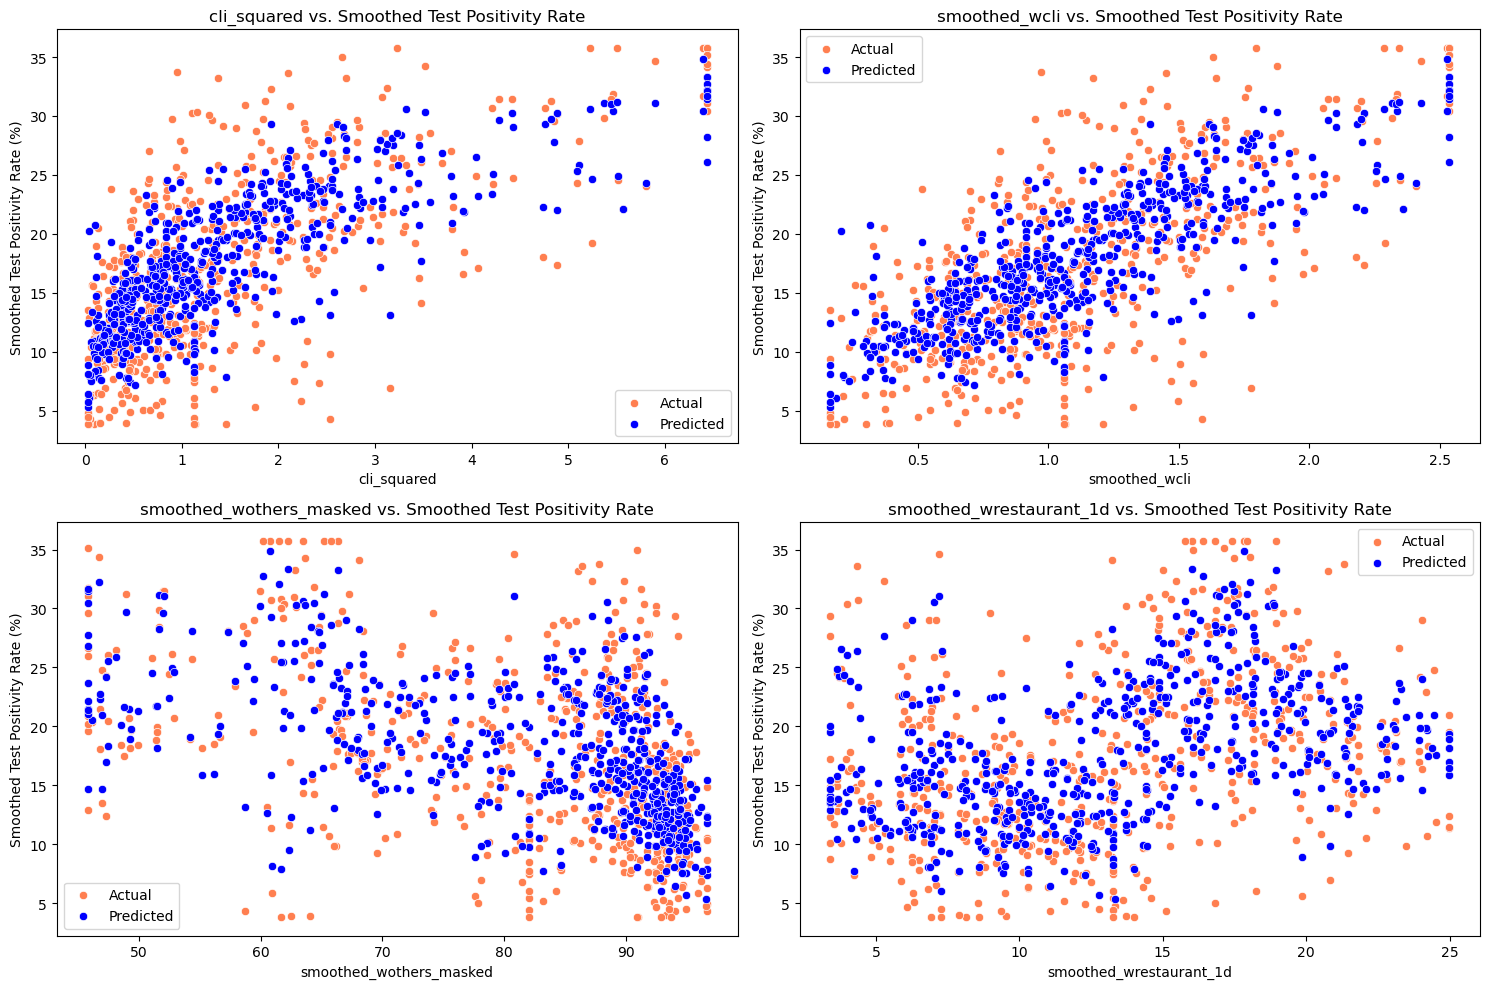

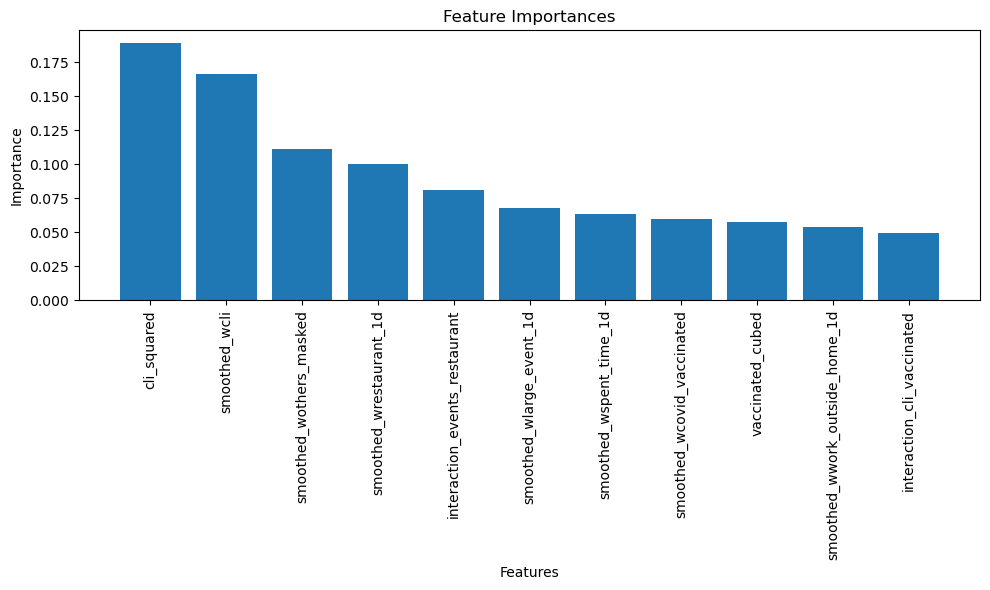

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp, get_dataset, info_plots

# Use 'best_rf_model' and 'X_test_scaled' from previous steps.
# 'X_test' is the original, unscaled test data.

# Scatter Plots with Predictions
plt.figure(figsize=(15, 10))

# Use 'best_rf_model.feature_importances_' (ensure this is accssible, check if errors occur)
# Find the indices of the top 4 most important features
# Originally did top 3 important feaetures, but because the first 'cli_squared' is a polynomial 
# of the second 'smoothed_wcli' updated to 4 most important
feature_importances = best_rf_model.feature_importances_
top_4_indices = feature_importances.argsort()[-4:][::-1]
top_4_features = X_test.columns[top_4_indices]

# Create plots for top 4
for i, feature in enumerate(top_4_features):
  plt.subplot(2,2,i+1)
  sns.scatterplot(x=X_test[feature], y=y_test, color='coral', label="Actual")
  sns.scatterplot(x=X_test[feature], y=y_pred_test, color='blue', label="Predicted")
  plt.title(f'{feature} vs. Smoothed Test Positivity Rate')
  plt.xlabel(feature)
  plt.ylabel('Smoothed Test Positivity Rate (%)')
  plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_names = X_test.columns
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [20]:
# If run into dependecy issues check version of numpy and troubleshoot

# import numpy as np
# print(np.__version__)

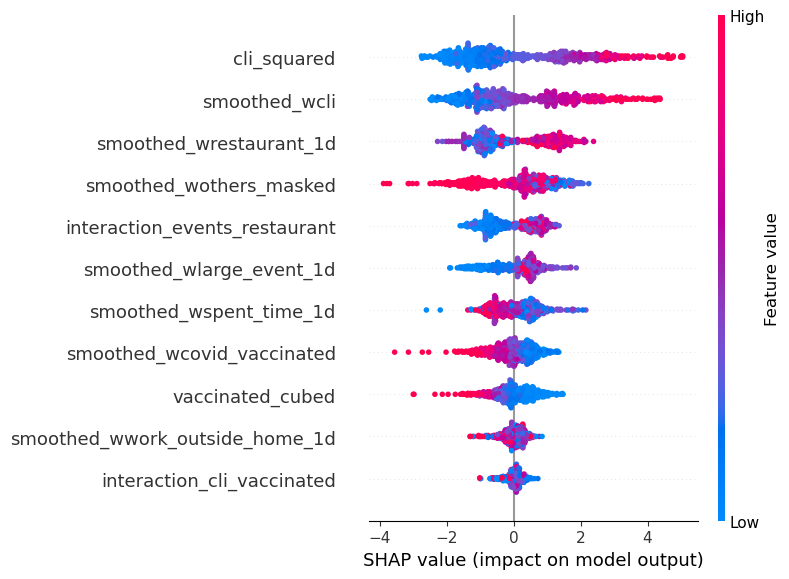

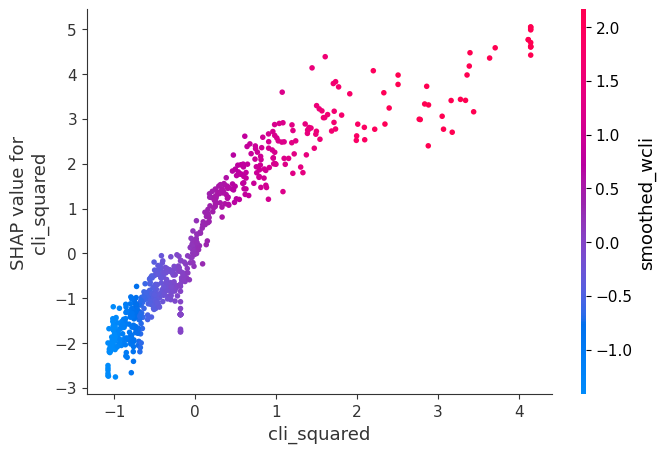

In [21]:
# Utilizing Shap for additional explainability, and to see if it agrees with previous feature importance concusions

import shap
shap.initjs()

# Assuming best_rf_model, X_test_scaled are defined

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

# Dependence plot (similar to PDP)
# Adjust feature_names[0] with desired feature to investigate
shap.dependence_plot(feature_names[9], shap_values, X_test_scaled, feature_names=feature_names) 

# Force plot (for individual predictions)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=feature_names)